In [1]:
# ch7 딥러닝

In [2]:
# 7-1 인공신경망

In [10]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [11]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


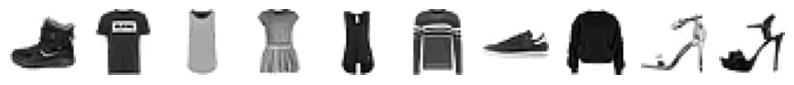

In [12]:
# input 데이터 확인.
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')
plt.show()

In [13]:
# target 데이터 확인.
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [14]:
# target당 몇 개의 데이터가 있는지 확인
import numpy as np
print(np.unique(train_target, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [15]:
# 데이터의 크기가 크기 때문에, 전체 데이터를 한꺼번에 사용하여 모델을 훈련하는 것보다 하나씩 꺼내서 모델을 훈련하는 방법이 더 효율적임
# stochastic gradient descent 이용

# SGDClassifier은 2차원 입력을 다루지 못하므로 reshape
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [16]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs= -1)
print(np.mean(scores['test_score']))

# 점수가 그렇게 높지 않음, epoch를 늘려도 비슷한 결과를 출력.

0.8196000000000001


In [2]:
# 인공 신경망 이용
import tensorflow as tf
from tensorflow import keras

In [3]:
# 딥러닝에선 교차 검증을 잘 사용하지 않음
  # 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적임
  # 교차 검증을 수행하기에는 시간이 너무 오래 걸림
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

NameError: ignored

In [ ]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

In [ ]:
# 밀집층 생성
dense = keras.layers.Dense(10, activation= 'softmax', input_shape=(784,))
# (뉴런 개수, 뉴련의 출력에 적용할 함수, 입력의 크기)
# 10개의 패션 아이템을 분류하기 때문에 10개로 지정
# 다중 분류이기 때문에 softmax 함수 지정

In [ ]:
model = keras.Sequential(dense)

In [ ]:
# keras 모델은 훈련 전에 설정 단계가 존재
# target을 one-hot-encoding으로 변경하지 않고 사용
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(train_scaled, train_target, epochs = 5)

In [ ]:
model.evaluate(val_scaled, val_target)

In [4]:
# 4-2 심층 신경망
# 인공 신경망에 층을 여러 개 추가하기

In [5]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
from sklearn.model_selection import train_test_split
# 이미지의 픽셀값을 0~255 범위에서 0~1로 변환하는 과정
train_scaled = train_input / 255.0

# 2차원배열을 1차원배열로 만드는 과정
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [7]:
# 입력층과 출력층 사이에 층을 추가해줌, 그 사이에 있는 층들을 은닉층이라고 함.
# 은닉층에는 활성화 함수가 표시되어 있는데, 이전 출력층에 적용했던 softmax 함수도 활성화함수.
# 출력층에 적용하는 활성화함수는 sigmoid, softmax로 제한되어 있지만, 은닉층의 활성화함수는 비교적 자유로움.

# 은닉층의 활성화함수엔 sigmoid, 출력층의 활성화함수엔 softmax를 적용해봄.

# 은닉층의 뉴런을 100개로 설정함. 뉴런 개수를 정하는 데에는 특별한 기준은 없으나, 몇 개의 뉴런을 둘 지 판단하기 위해선 많은 경험이 필요.
# 단, 출력층의 뉴런보다는 많게 만들어야 함.
dense1 = keras.layers.Dense(100, activation ='sigmoid', input_shape = (784,))

# 출력층의 뉴런은 최종적으로 분류될 item의 개수
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [8]:
# 생성된 두 개의 층으로 심층 신경망 생성
model = keras.Sequential([dense1, dense2])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# dense 객체를 만들지 않고 바로 추가하는 방법
model = keras.Sequential([keras.layers.Dense(100, activation ='sigmoid', input_shape = (784,), name = 'hidden'), keras.layers.Dense(10, activation = 'softmax', name = 'output')], name = 'fashion MNIST Model')

In [11]:
model.summary()

Model: "fashion MNIST Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# 또 다른 방법으로 객체 생성 후 add이용
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation ='sigmoid', input_shape = (784,), name = 'hidden'))
model.add(keras.layers.Dense(10, activation = 'softmax', name = 'output'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 9s 2ms/step - loss: 0.5702 - accuracy: 0.8057
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4121 - accuracy: 0.8497
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3759 - accuracy: 0.8645
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3529 - accuracy: 0.8716
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3359 - accuracy: 0.8774


In [14]:
# ReLU 함수, max(0, z)
model = keras.Sequential()

# 입력층 뒤에 Flatten 추가함, 나머지 입력 차원을 모두 일렬로 펼치는 역할
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [17]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)

# sigmoid 함수를 사용했을 때보다 성능이 조금 향상됨

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5353 - accuracy: 0.8114
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3960 - accuracy: 0.8570
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3566 - accuracy: 0.8714
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3327 - accuracy: 0.8801
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3158 - accuracy: 0.8861


In [19]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8814


[0.3452602028846741, 0.8814166784286499]

In [ ]:
# keras는 다양한 종류의 gradient descent 알고리즘을 제공함. 이를 optimizer라고 함

In [21]:
# 다른 optimizer 테스트
# SDG
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [23]:
# 또는 이렇게
sgd = keras.optimizers.SGD()
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [24]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [25]:
# momentum optimization : 현재의 기울기뿐 아니라 더 과거의 업테이트 방향도 고려함.
# 이전 방식보다 더 빠르게 수렴할 수 있음
# local minimum에서 벗어나는 데 도움이 됨.
# 너무 클 경우 overshooting 문제가 발생할 수 있음.
sgd = keras.optimizers.SGD(momentum = 0.9, nesterov = True)

In [29]:
# 적응형 학릅률을 사용하는 대표적인 optimizer
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer = adagrad, loss = 'sparse_categorical_crossentropy', metrics= 'accuracy')

rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer = rmsprop, loss = 'sparse_categorical_crossentropy', metrics= 'accuracy')

In [31]:
# momentum optimization과 rmsprop의 장점을 접목한 adam
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape= (28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= 'accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5260 - accuracy: 0.8168
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3918 - accuracy: 0.8588
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3525 - accuracy: 0.8719
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3278 - accuracy: 0.8814
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3081 - accuracy: 0.8863


In [34]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3387 - accuracy: 0.8755


[0.33872586488723755, 0.8755000233650208]

In [36]:
# 7-3 신경망 모델 훈련
# 모델을 훈련하는데 필요한 다양한 도구들을 알아보자

In [68]:
# 손실함수
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [69]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [70]:
model = model_fn()
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# verbose = 0 : 훈련과정을 출력하지 않음.
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [72]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


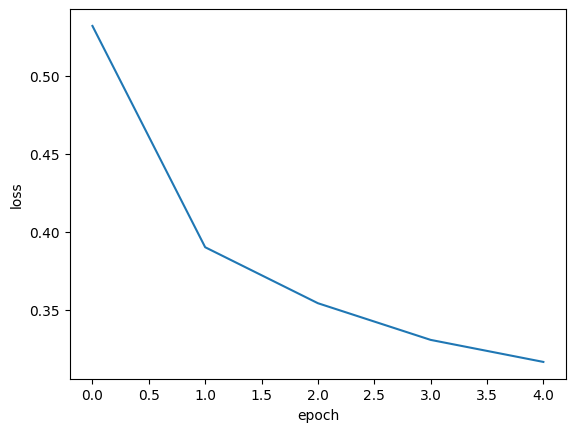

In [73]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

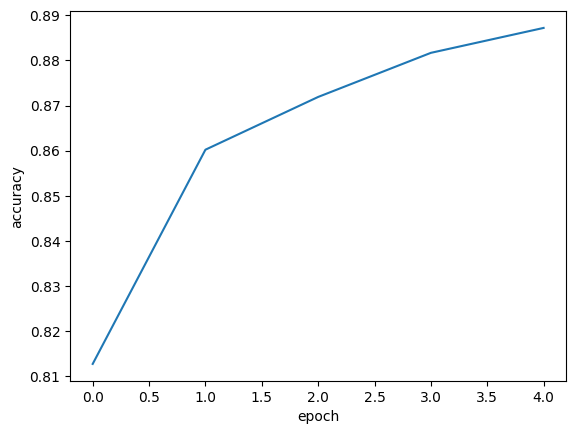

In [74]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

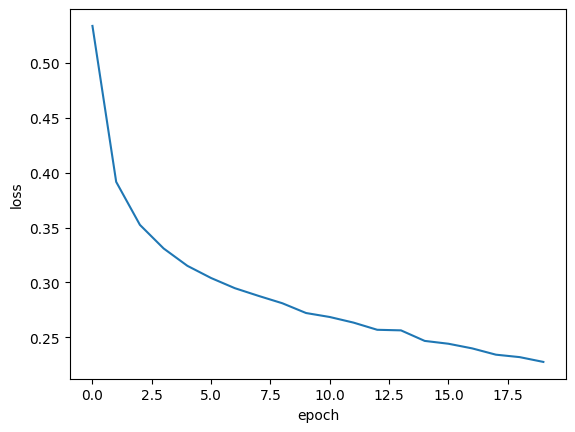

In [75]:
# epoch를 늘려서 손실도와 정확도를 재측정
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [76]:
# overfitting이 되진 않았는지 확인.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [78]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


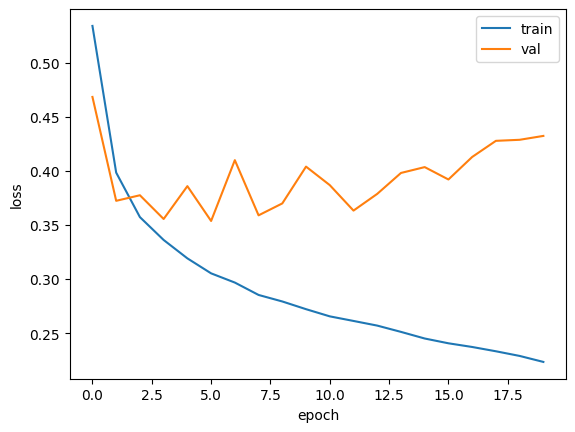

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 어느 기점으로 validation 데이터는 손실이 증가함

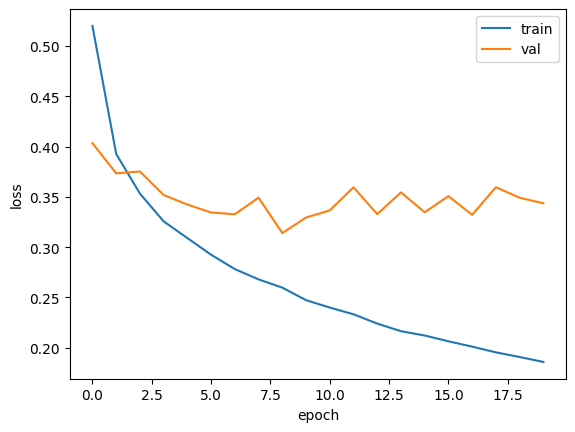

In [80]:
# 하이퍼파라미터를 조정하여 overfitting을 완화하는 방법을 알아보자

# adam optimazer를 이용
model = model_fn()
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 손실이 이전보다 줄어듦을 확인. 이 데이터셋에는 adam optimazer가 잘 맞는다는 것을 확인.

In [ ]:
# dropout